In [1]:
import math
import random
import torch
import numpy as np
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import copy
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import copy
import time

D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#global veriable 
Uniform_low_bound=0
Uniform_up_bound=1
Agent_number_n=3

number_of_groups=2

Normal_loc=0.5
Normal_scale=0.2
Normal_loc1=0.3
Normal_loc2=0.7
Normal_scale1=0.1
Normal_scale2=0.1
Distribution_number=1000
target = "min_sum"
#target = "min_max"

In [3]:
popSize = 100
eliteSize = 10
mutationRate = 0.1
generations = 50

global NeighborhoodRate
NeighborhoodRate = 0.05

In [4]:
class Foo(object):

    def __init__(self, test_item, test_change_item, deadline):
        self.test_item = test_item
        self.test_change_item = test_change_item
        self.deadline = deadline

    def __lt__(self, other):
        return self.test_change_item < other.test_change_item

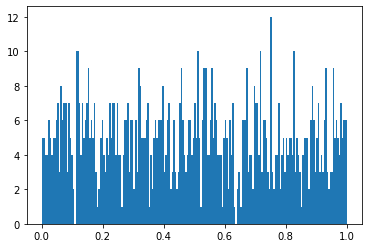

100
900


In [5]:

seed = 7
np.random.seed(seed)
#exec(open('distribution/uniform.py').read())
#exec(open('distribution/beta.py').read())
exec(open('../../distribution/uniform.py').read())
for i in range(len(value_list)):
    for j in range(len(value_list[0])):
        if(value_list[i][j]<=0):
            value_list[i][j]=0
        if(value_list[i][j]>=1):
            value_list[i][j]=1
            
value_list1=np.array(value_list)
for i in range(min(Agent_number_n,1)):
    pa=value_list1[:,i]
    plt.hist(pa,bins=200)
    plt.show()


X_train,  X_test = train_test_split(value_list, test_size=0.9, random_state=seed)

dataset_size = len(X_train)
print(dataset_size)
#print(X_train[:100])
print(len(X_test))
#run_cs()

In [6]:
#Cost Sharing
def run_cs_prue():
    sum_delay=0
    max_delay=0
    test_number=0
    for i in range(len(X_test)):
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test=X_test[i];
        
        for k in range(Agent_number_n,0,-1):
            count=0;
            delay=0;
            for item in test:
                if(item+1e-9>=1.0/k):
                    count+=1;
                else:
                    delay+=1;
            if(count>=k):
                temp_delay=delay;
                if temp_delay != 0 :
                    temp_max_delay = 1
                break;
            if(k<=1):
                #print(test);
                temp_delay=Agent_number_n;
                temp_max_delay=1
        sum_delay+=temp_delay
        max_delay+=temp_max_delay
                
    print("max_delay",max_delay/test_number);
    print("sum_delay",sum_delay/test_number);
    
run_cs_prue()

max_delay 0.7311111111111112
sum_delay 1.6377777777777778


In [12]:
print(np.array(X_test)[:,0])



[0.87362736 0.38173461 0.36989807 0.87370783 0.61923546 0.225962
 0.14435107 0.53020539 0.09426441 0.03940856 0.30873366 0.32763012
 0.56578423 0.28972957 0.39545258 0.8462628  0.27588452 0.36037685
 0.33592618 0.49372518 0.01591041 0.66154727 0.68041522 0.53198467
 0.71705024 0.53265769 0.48582523 0.27935102 0.46275855 0.07059799
 0.97716367 0.27604905 0.16679945 0.26035696 0.65614058 0.31935922
 0.34287524 0.25046484 0.11325133 0.53499176 0.6880665  0.88933911
 0.15428481 0.29472759 0.71662952 0.48758912 0.14506117 0.96501412
 0.53227255 0.11862982 0.20010175 0.97445725 0.59792887 0.81282955
 0.24160292 0.41319337 0.98334434 0.33808824 0.4205671  0.48391857
 0.75380103 0.8554743  0.89208426 0.48371861 0.82066633 0.8122388
 0.28789623 0.11682512 0.27038376 0.43491813 0.13488516 0.15199239
 0.75634643 0.46373931 0.19577433 0.99737051 0.21925214 0.03900131
 0.4101549  0.03497306 0.71021828 0.89573092 0.36843024 0.91626835
 0.57486799 0.91615258 0.08393715 0.42106767 0.31663754 0.7383459

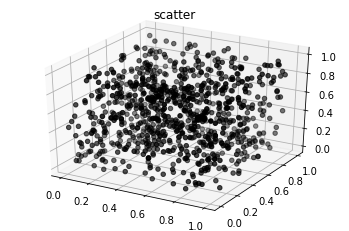

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter (np.array(X_test)[:,0], np.array(X_test)[:,1], np.array(X_test)[:,2], color='black')
ax.set_title("scatter");

In [ ]:
#Cost Sharing
def run_cs_prue():
    sum_delay=0
    max_delay=0
    test_number=0
    for i in range(len(X_test)):
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test=X_test[i];
        
        for k in range(Agent_number_n,0,-1):
            count=0;
            delay=0;
            for item in test:
                if(item+1e-9>=1.0/k):
                    count+=1;
                else:
                    delay+=1;
            if(count>=k):
                temp_delay=delay;
                if temp_delay != 0 :
                    temp_max_delay = 1
                break;
            if(k<=1):
                #print(test);
                temp_delay=Agent_number_n;
                temp_max_delay=1
        sum_delay+=temp_delay
        max_delay+=temp_max_delay
                
    print("max_delay",max_delay/test_number);
    print("sum_delay",sum_delay/test_number);
    
run_cs_prue()

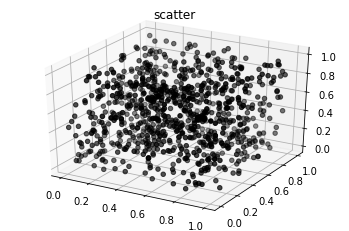

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array(X_test)[:,0]
Y = np.array(X_test)[:,1]
Z = np.array(X_test)[:,2]

ax.scatter (X,Y,Z, color='black')
ax.set_title("scatter");

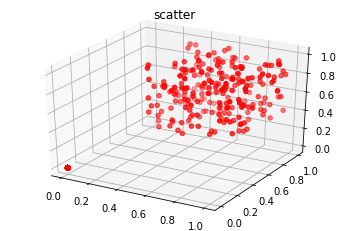

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array(X_test)[:,0]
Y = np.array(X_test)[:,1]
Z = np.array(X_test)[:,2]

condition = (X>=1/3) * (Y>=1/3) * (Z>=1/3)
XX=(X * condition)
YY=(Y * condition)
ZZ=(Z * condition)
    
ax.scatter (XX,YY,ZZ, color='red')
ax.set_title("scatter");

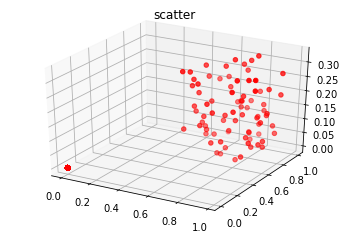

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array(X_test)[:,0]
Y = np.array(X_test)[:,1]
Z = np.array(X_test)[:,2]

condition = (X>=1/2) * (Y>=1/2) * (Z<=1/3) 
XX=(X * condition)
YY=(Y * condition)
ZZ=(Z * condition)
    
ax.scatter (XX,YY,ZZ, color='red')
ax.set_title("scatter");